In [1]:
from Module.Deep_Belief_Network.DBN import DBN
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

# 1,加载数据：
mnist_data = datasets.MNIST('../DataSets', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

The number shown is the number: 2


/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


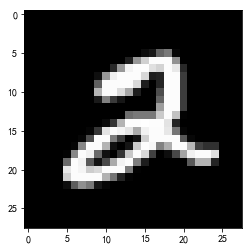

In [4]:
# mnist_data.train_data = (mnist_data.train_data.type(torch.FloatTensor)/255).bernoulli()

# visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [5]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
dbn_mnist = DBN(visible_units=28*28 ,
                hidden_units=[23*23 ,18*18] ,
                k = 5,
                learning_rate = 0.01,
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False)

In [6]:
num_epochs = 1
batch_size = 10

dbn_mnist.train_static(mnist_data.train_data,mnist_data.train_labels,num_epochs , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 6000it [00:41, 143.44it/s]
Epoch:1 ,avg_cost = 72170.671875 ,std_cost = 10477.7314453125 ,avg_grad = 12956226.0 ,std_grad = 1669524.75
--------------------
Training the 2 st rbm layer
RBM fitting: 6000it [00:17, 335.41it/s]
Epoch:1 ,avg_cost = 0.0007186493603512645 ,std_cost = 0.03608555719256401 ,avg_grad = 125.44574737548828 ,std_grad = 1084.447265625


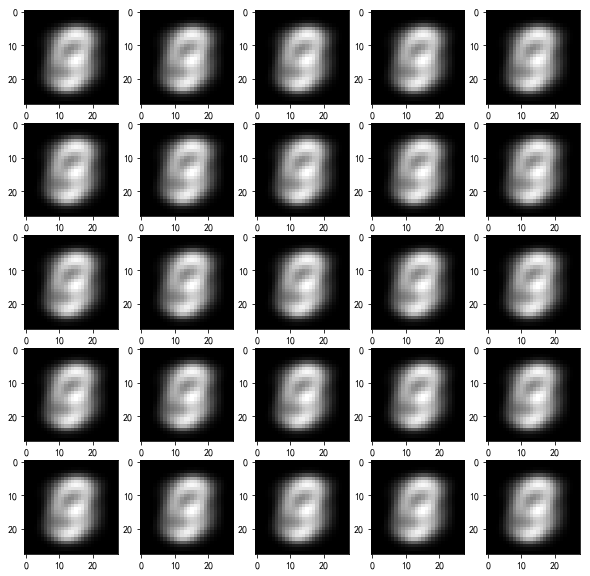

In [7]:
# visualising layer 1
learned_weights = dbn_mnist.rbm_layers[0].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

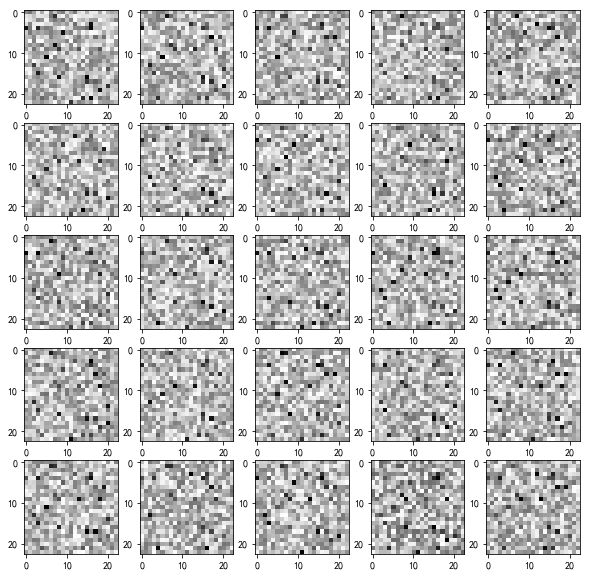

In [8]:
# visualising layer 2
learned_weights = dbn_mnist.rbm_layers[1].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((23,23)), cmap=plt.cm.gray)
plt.show()

In [9]:
number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.train_data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data.train_data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [10]:
train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [11]:
dbn_mnist.train_static(train_data,train_label,20 , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 542it [00:02, 181.81it/s]
Epoch:1 ,avg_cost = 70062.078125 ,std_cost = 10469.8232421875 ,avg_grad = 12782052.0 ,std_grad = 1688502.0
RBM fitting: 542it [00:03, 170.40it/s]
Epoch:2 ,avg_cost = 70062.0390625 ,std_cost = 10469.8310546875 ,avg_grad = 12780502.0 ,std_grad = 1688648.125
RBM fitting: 542it [00:03, 163.05it/s]
Epoch:3 ,avg_cost = 70062.0234375 ,std_cost = 10469.837890625 ,avg_grad = 12779230.0 ,std_grad = 1688703.875
RBM fitting: 542it [00:02, 194.93it/s]
Epoch:4 ,avg_cost = 70062.0078125 ,std_cost = 10469.83984375 ,avg_grad = 12778427.0 ,std_grad = 1688741.125
RBM fitting: 542it [00:02, 200.84it/s]
Epoch:5 ,avg_cost = 70061.984375 ,std_cost = 10469.8408203125 ,avg_grad = 12778074.0 ,std_grad = 1688749.125
RBM fitting: 542it [00:02, 192.55it/s]
Epoch:6 ,avg_cost = 70061.9765625 ,std_cost = 10469.8408203125 ,avg_grad = 12777655.0 ,std_grad = 1688738.25
RBM fitting: 542it [00:02, 193.40it/s]
Epoch:7 ,avg_cost = 70061.

The original number: 1


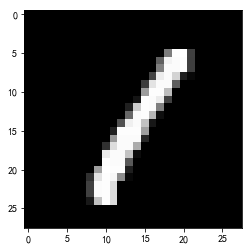

The reconstructed image


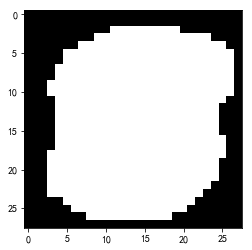

In [12]:
idx = 3
img = mnist_data.train_data[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= dbn_mnist.reconstruct(reconstructed_img)

reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()